In [1]:
import pandas as pd
import numpy as np

from matplotlib.pyplot import (axes,axis,title,legend,figure,
                               xlabel,ylabel,xticks,yticks,
                               xscale,yscale,text,grid,
                               plot,scatter,errorbar,hist,polar,
                               contour,contourf,colorbar,clabel,
                               imshow)
import matplotlib.pyplot as plt
import random
import math
import matplotlib
matplotlib.style.use('ggplot')

import os
os.chdir("C:/Users/olesh/Documents/programs/transopt_routing/mary")
import json



%matplotlib inline


In [2]:
os.environ['NUMEXPR_NUM_THREADS'] = '24'

## TEST

In [3]:
df = pd.read_csv('data_vertex.csv', sep = ' ')
df

freq  volume        lat        lon
0      0.0    0.00   0.000000   0.000000
1      1.0    3.00  -7.456729  11.286202
2      1.0    3.00  -7.887101   8.351324
3      1.0    5.50 -35.235300  21.868680
4      1.0    2.25 -33.095056  11.704452
...    ...     ...        ...        ...
1465   2.0    4.50  -2.095575  -4.352782
1466   1.0    2.25  13.734431   6.251102
1467   1.0    1.50   8.347999   5.568021
1468   1.0    1.50  10.869338   5.883266
1469   1.0    1.50  11.763136   5.997214

[1470 rows x 4 columns]

In [4]:
df.describe()

freq       volume          lat          lon
count  1470.000000  1470.000000  1470.000000  1470.000000
mean      1.265306     2.850486   -11.842256    13.561485
std       0.474346     1.599382    20.668912    19.214986
min       0.000000     0.000000   -45.160284   -20.082136
25%       1.000000     1.500000   -26.740478    -0.472756
50%       1.000000     2.250000   -17.174207    10.180191
75%       2.000000     3.300000    -2.936384    23.741762
max       3.000000    12.750000    50.867495    57.880476

In [5]:
X = df['lat']
Y = df['lon']

In [8]:
def get_routs(routs_index):
    routs = []
    for rout in routs_index:
        rout_X = []
        rout_Y = []
        for vertex in rout:
            rout_X.append(X[vertex])
            rout_Y.append(Y[vertex])
        routs.append([rout_X, rout_Y])
    return routs

def get_rout_index():
    file_rout = open('res.txt', 'r')
    routs_str = file_rout.read().split(';')
    routs = []
    for rout_str in routs_str:
        if rout_str == '':
            continue
        vertexes_str = rout_str.split(' ')
        vertexes = []
        for vertex_str in vertexes_str:
            if vertex_str == '':
                continue
            vertexes.append(int(vertex_str))
        routs.append(vertexes)
    return routs

def get_rout_index_with_clust():
    routs_clust = []
    file_clust = open('res_clust.txt', 'r')
    routs_clust_str = file_clust.read().split(':')
    for routs_str in routs_clust_str:
        if routs_str == '':
                continue
        routs = []

        for rout_str in routs_str.split(';'):
            if rout_str == '':
                continue
            vertexes_str = rout_str.split(' ')
            vertexes = []
            for vertex_str in vertexes_str:
                if vertex_str == '':
                    continue
                vertexes.append(int(vertex_str))
            routs.append(vertexes)
        routs_clust.append(routs)
    return routs_clust


def get_rout_file(name):
    file_rout = open(name, 'r')
    routs_str = file_rout.read().split(';')
    routs = []
    for rout_str in routs_str:
        if rout_str == '':
            continue
        vertexes_str = rout_str.split(' ')
        vertexes = []
        for vertex_str in vertexes_str:
            if vertex_str == '':
                continue
            vertexes.append(int(vertex_str))
        routs.append(vertexes)
    return routs

def get_rout_clust_file(name):
    routs_clust = []
    file_clust = open(name, 'r')
    routs_clust_str = file_clust.read().split(':')
    for routs_str in routs_clust_str:
        if routs_str == '':
                continue
        routs = []

        for rout_str in routs_str.split(';'):
            if rout_str == '':
                continue
            vertexes_str = rout_str.split(' ')
            vertexes = []
            for vertex_str in vertexes_str:
                if vertex_str == '':
                    continue
                vertexes.append(int(vertex_str))
            routs.append(vertexes)
        routs_clust.append(routs)
    return routs_clust
    

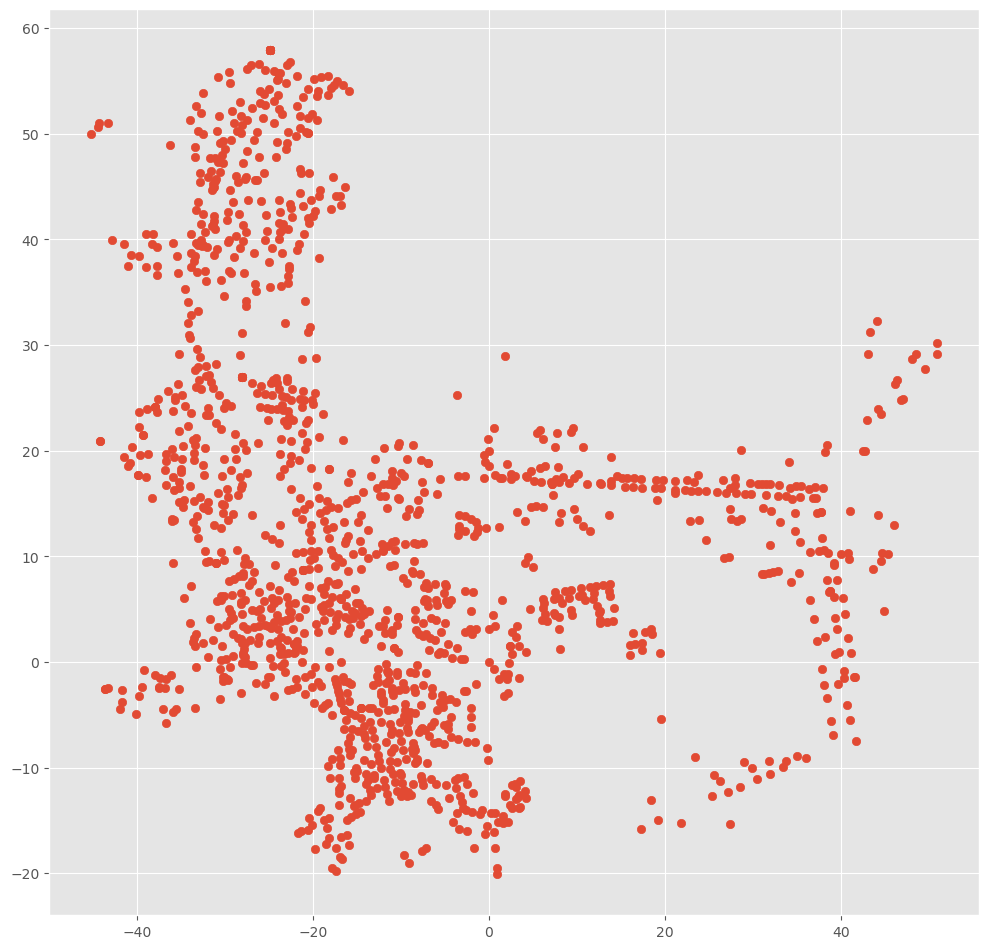

In [9]:
fig = plt.figure(figsize=(12,12), dpi=100)

scatter(X,Y)

## read cluster

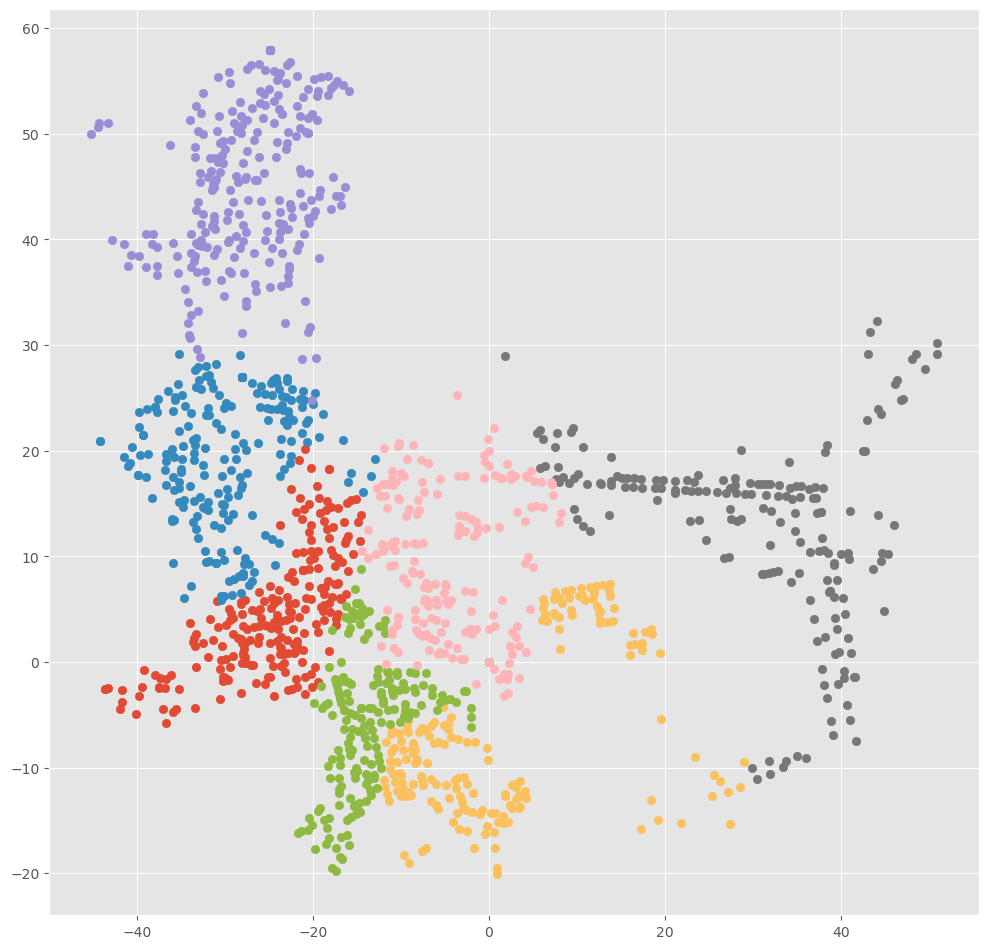

In [10]:
file_clust = open('cluster.txt', 'r')
clusters_str = file_clust.read().split(';')
clusters = []

for clust_str in clusters_str:
    vertexes_str = clust_str.split(' ')
    vertexes = []
    for vertex_str in vertexes_str:
        vertexes.append(int(vertex_str))
    clusters.append(vertexes)
    
fig = plt.figure(figsize=(12,12), dpi=100)

for clust in clusters:
    x = df.iloc[clust]['lat']
    y = df.iloc[clust]['lon']
    scatter(x,y)
        

## clust test result

In [15]:
os.chdir("C:/Users/olesh/Documents/programs/transopt_routing/mary/tests")

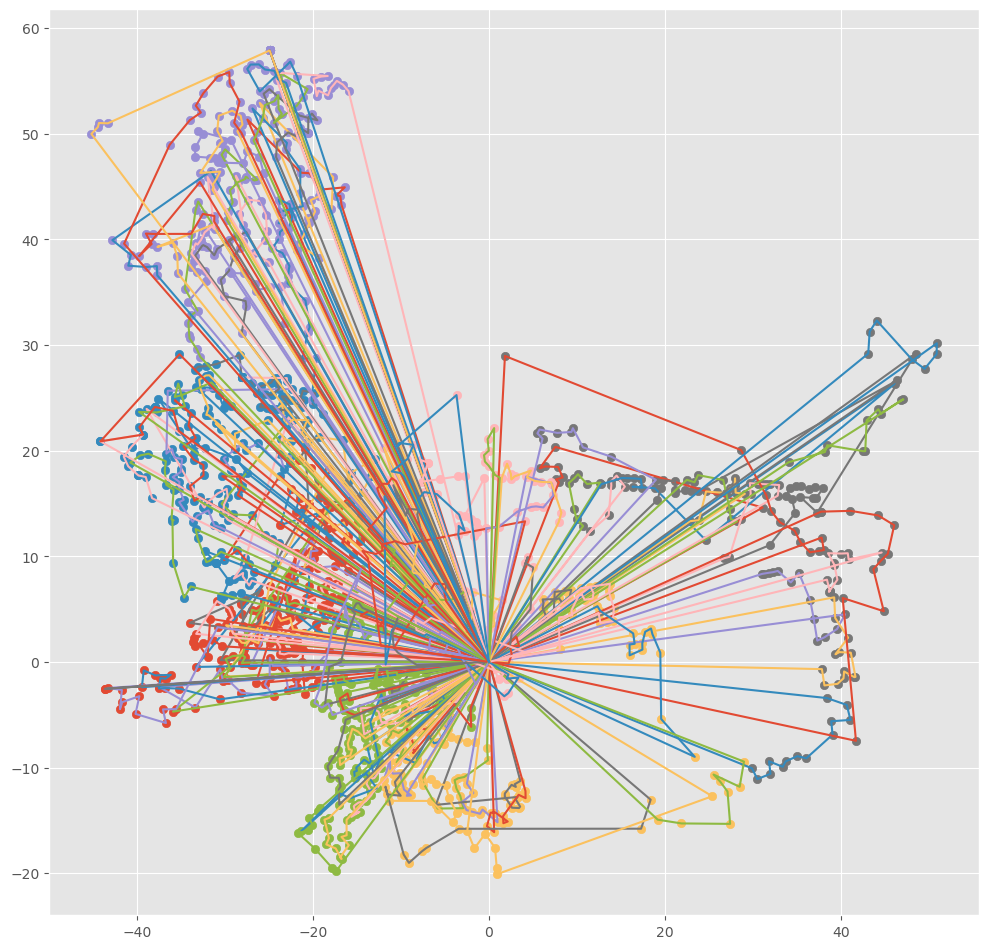

In [14]:
# greedy_test
# time: 1246 millisec
# lenght: 15476.2
routs_clust_index = routs_clust_index = get_rout_clust_file('greedy_res.txt')


fig = plt.figure(figsize=(12,12), dpi=100)
for clust in clusters:
    x = df.iloc[clust]['lat']
    y = df.iloc[clust]['lon']
    scatter(x,y)

for routs_index in routs_clust_index:
    routs = get_routs(routs_index)
    for rout in routs:
        plt.plot(rout[0], rout[1])

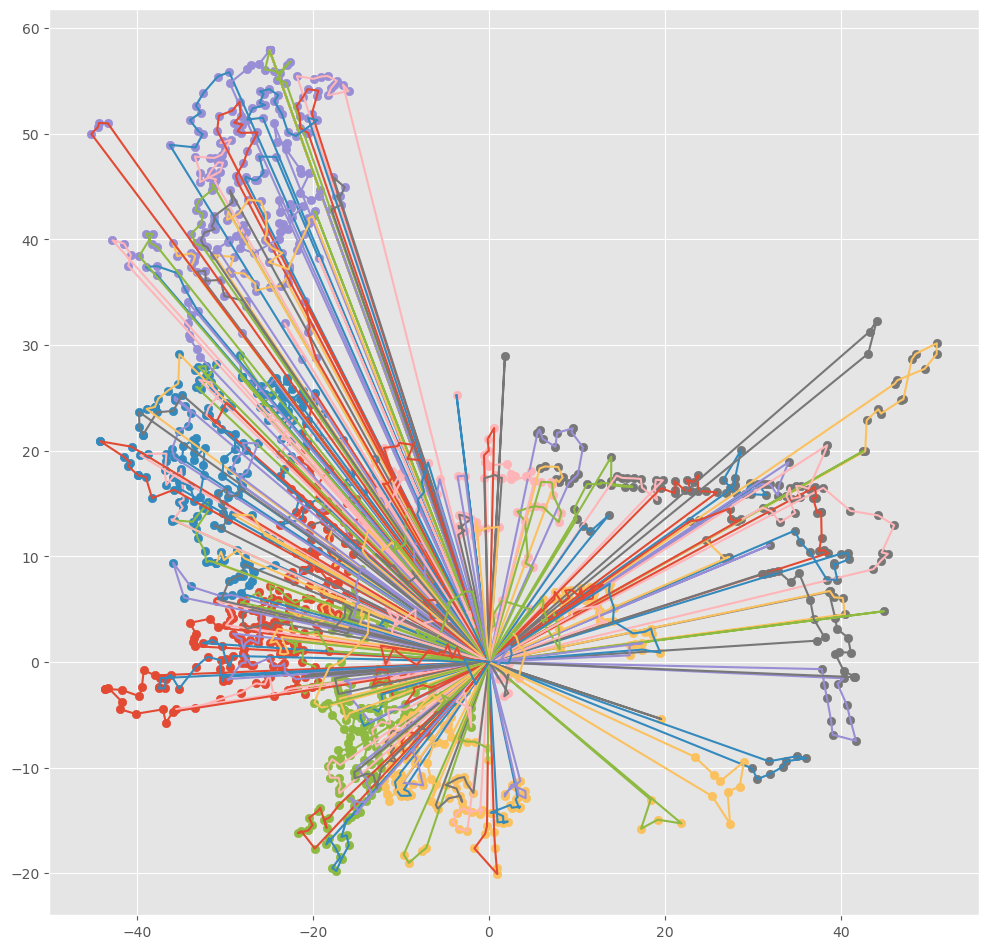

In [18]:
# clurk
# time: 9898 millisec
# lenght: 17021.5
routs_clust_index = routs_clust_index = get_rout_clust_file('clurk_res.txt')


fig = plt.figure(figsize=(12,12), dpi=100)
for clust in clusters:
    x = df.iloc[clust]['lat']
    y = df.iloc[clust]['lon']
    scatter(x,y)

for routs_index in routs_clust_index:
    routs = get_routs(routs_index)
    for rout in routs:
        plt.plot(rout[0], rout[1])

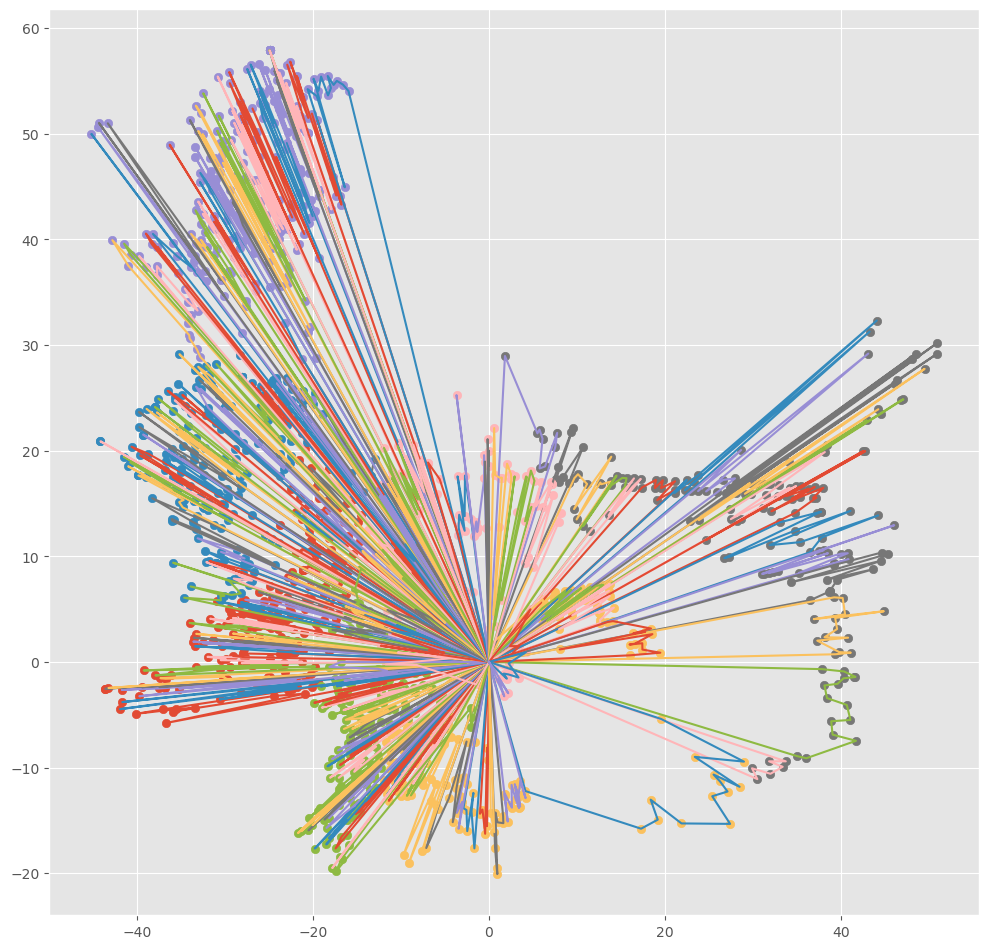

In [19]:
# sweeping
# time: 615 millisec
# lenght: 20492.6
routs_clust_index = routs_clust_index = get_rout_clust_file('sweeping_res.txt')


fig = plt.figure(figsize=(12,12), dpi=100)
for clust in clusters:
    x = df.iloc[clust]['lat']
    y = df.iloc[clust]['lon']
    scatter(x,y)

for routs_index in routs_clust_index:
    routs = get_routs(routs_index)
    for rout in routs:
        plt.plot(rout[0], rout[1])

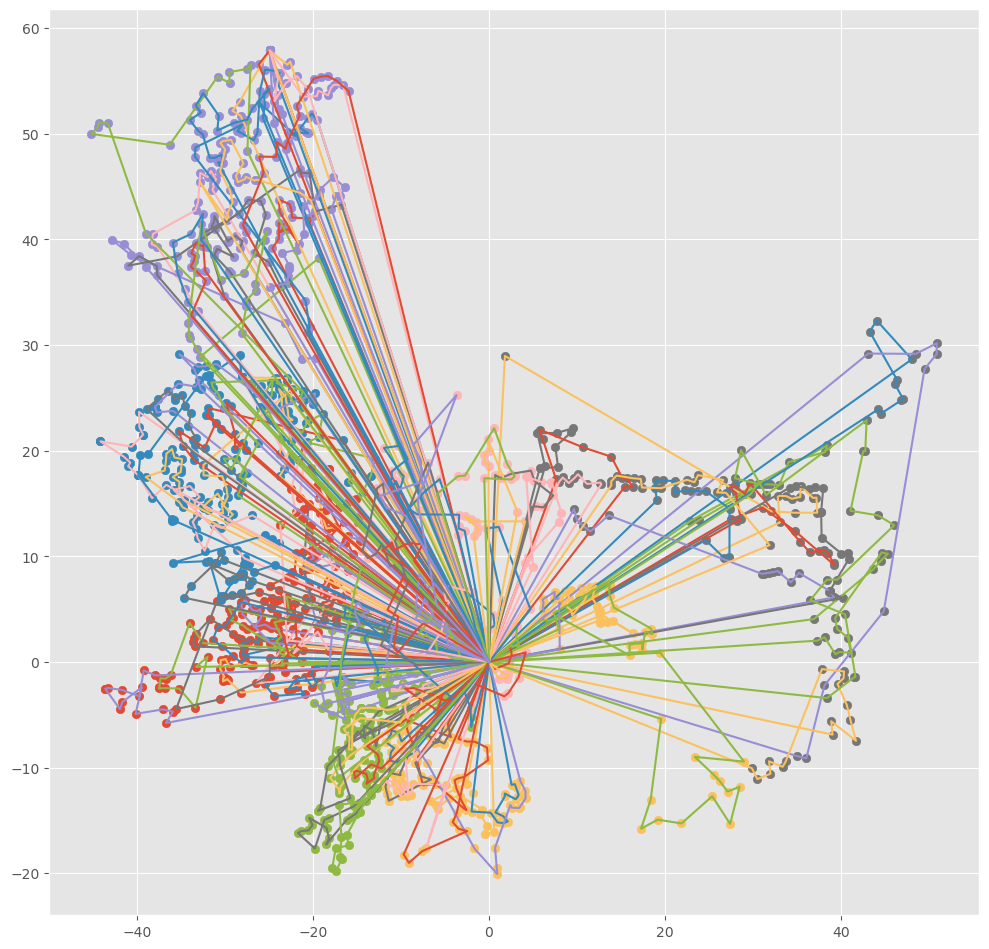

In [20]:
# ant
# time: 282251 millisec
# length: 14493.2
routs_clust_index = routs_clust_index = get_rout_clust_file('ant_res.txt')


fig = plt.figure(figsize=(12,12), dpi=100)
for clust in clusters:
    x = df.iloc[clust]['lat']
    y = df.iloc[clust]['lon']
    scatter(x,y)

for routs_index in routs_clust_index:
    routs = get_routs(routs_index)
    for rout in routs:
        plt.plot(rout[0], rout[1])

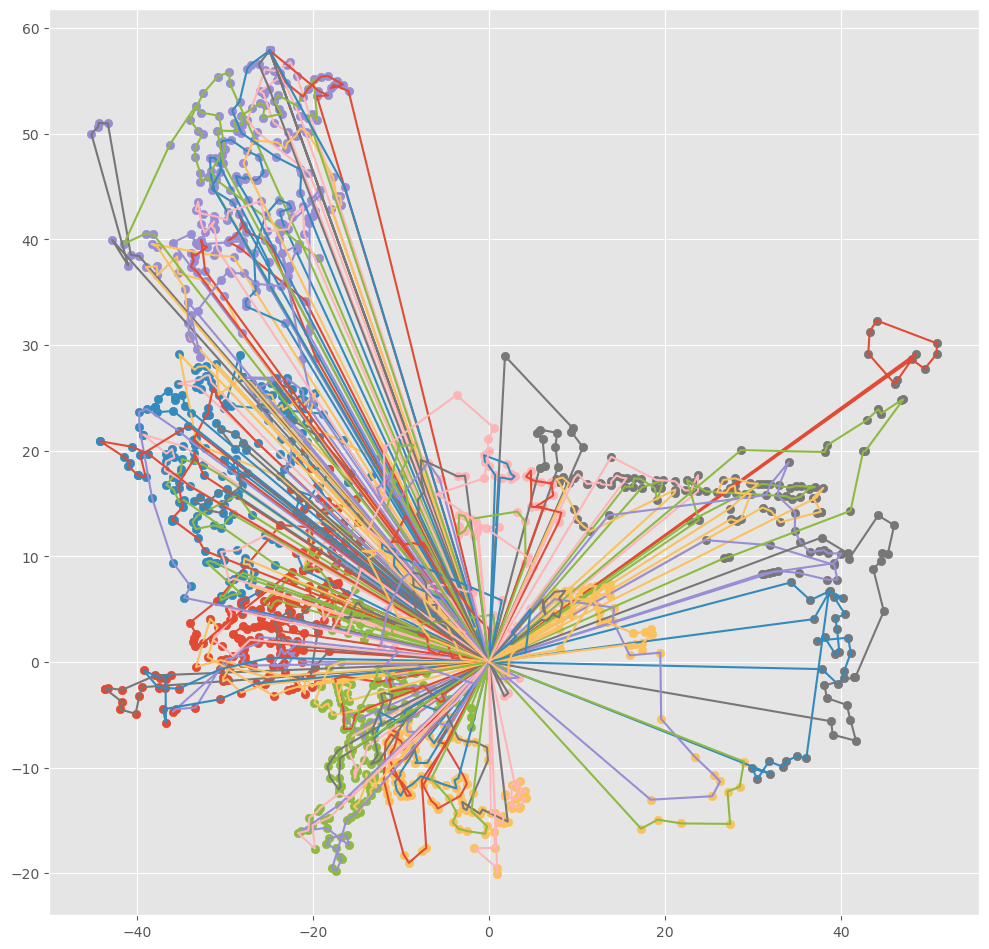

In [21]:
# osman
# time: 562581 millisec
# length: 13863.5
routs_clust_index = routs_clust_index = get_rout_clust_file('osman_res.txt')


fig = plt.figure(figsize=(12,12), dpi=100)
for clust in clusters:
    x = df.iloc[clust]['lat']
    y = df.iloc[clust]['lon']
    scatter(x,y)

for routs_index in routs_clust_index:
    routs = get_routs(routs_index)
    for rout in routs:
        plt.plot(rout[0], rout[1])

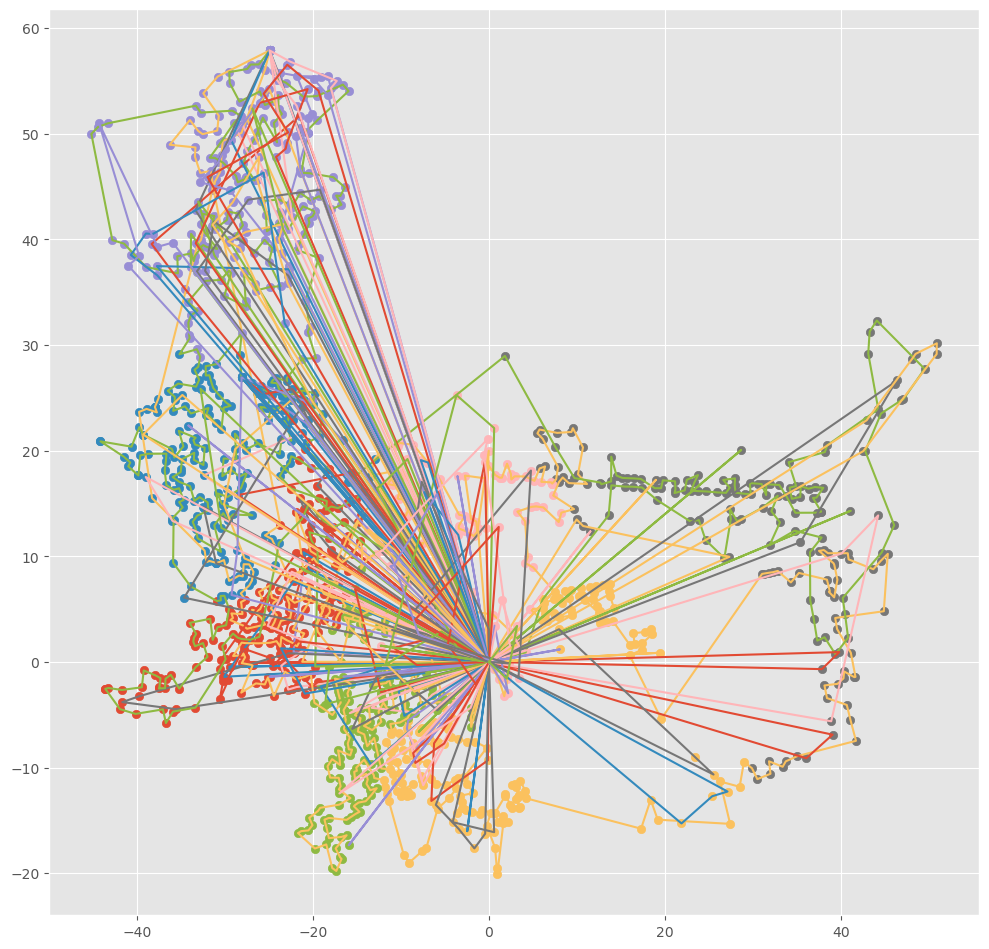

In [23]:
# final
# time: 823241 millisec
# length: 13781.6
routs_clust_index = routs_clust_index = get_rout_clust_file('final_res.txt')


fig = plt.figure(figsize=(12,12), dpi=100)
for clust in clusters:
    x = df.iloc[clust]['lat']
    y = df.iloc[clust]['lon']
    scatter(x,y)

for routs_index in routs_clust_index:
    routs = get_routs(routs_index)
    for rout in routs:
        plt.plot(rout[0], rout[1])

## clust local search test result

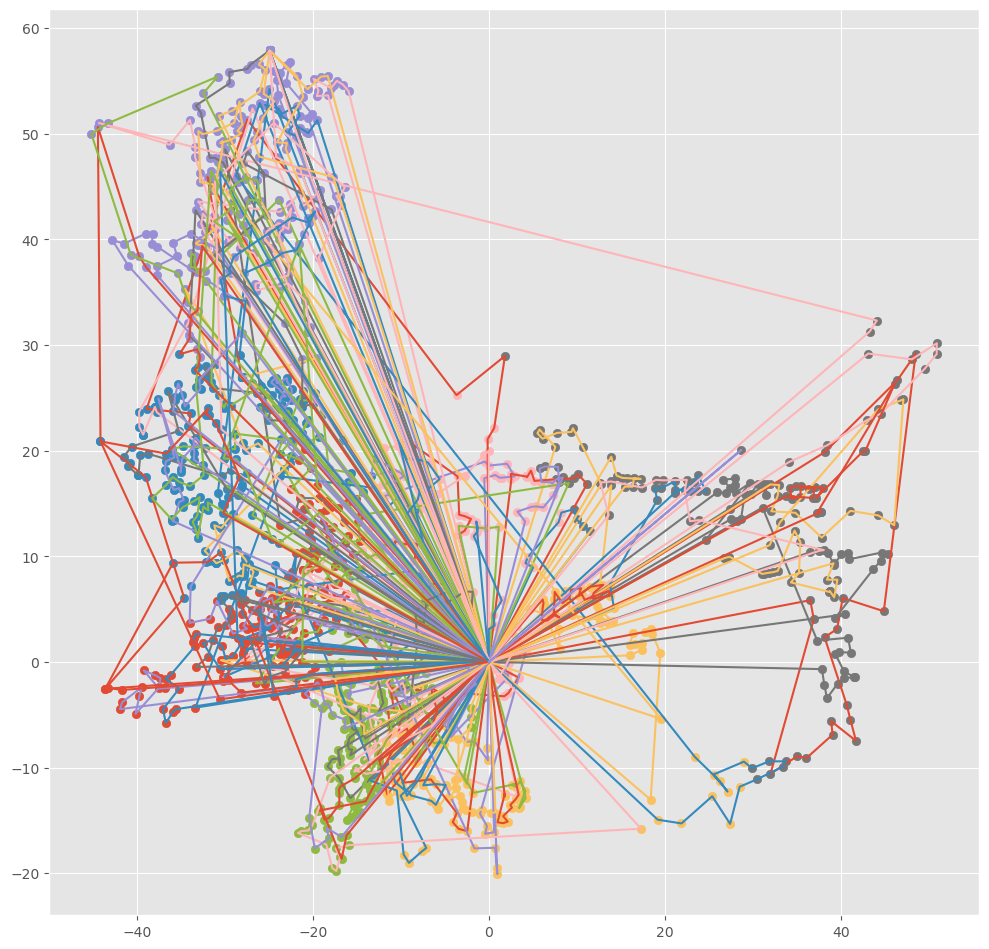

In [10]:
# local
# lenght: 15293.6
routs_index = routs_clust_index = get_rout_index()

fig = plt.figure(figsize=(12,12), dpi=100)
for clust in clusters:
    x = df.iloc[clust]['lat']
    y = df.iloc[clust]['lon']
    scatter(x,y)

routs = get_routs(routs_index)
for rout in routs:
    plt.plot(rout[0], rout[1])

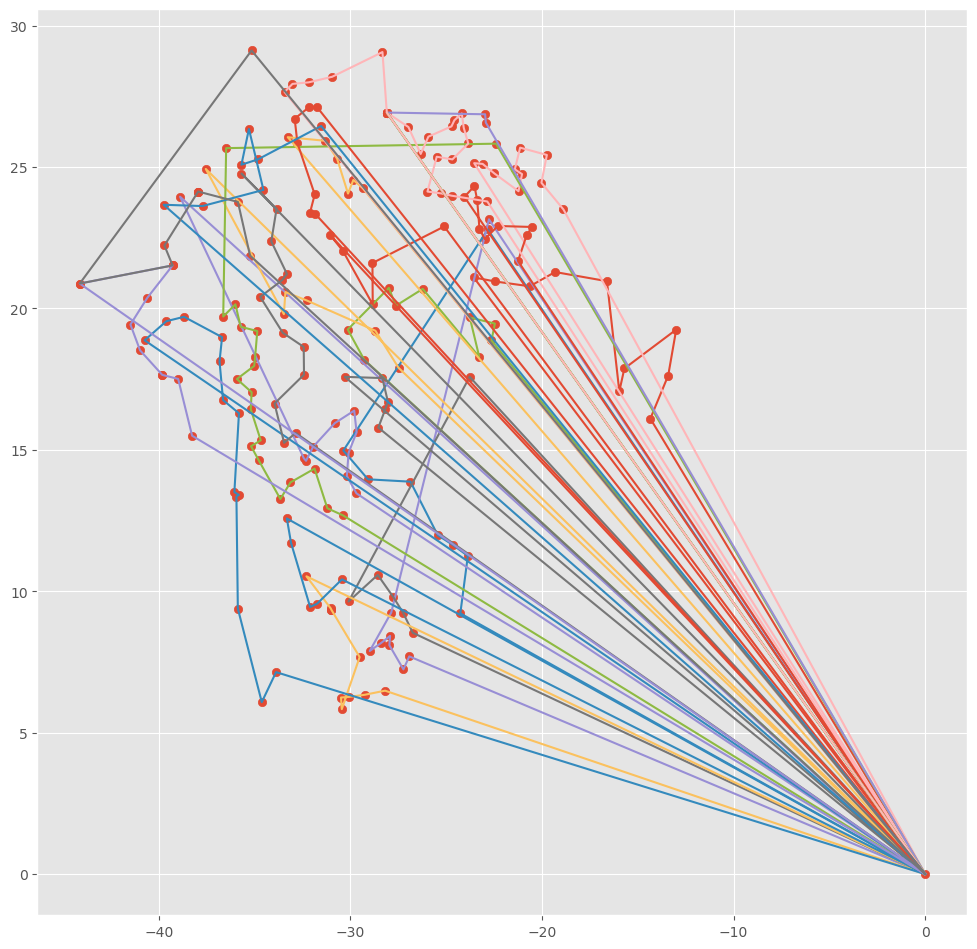

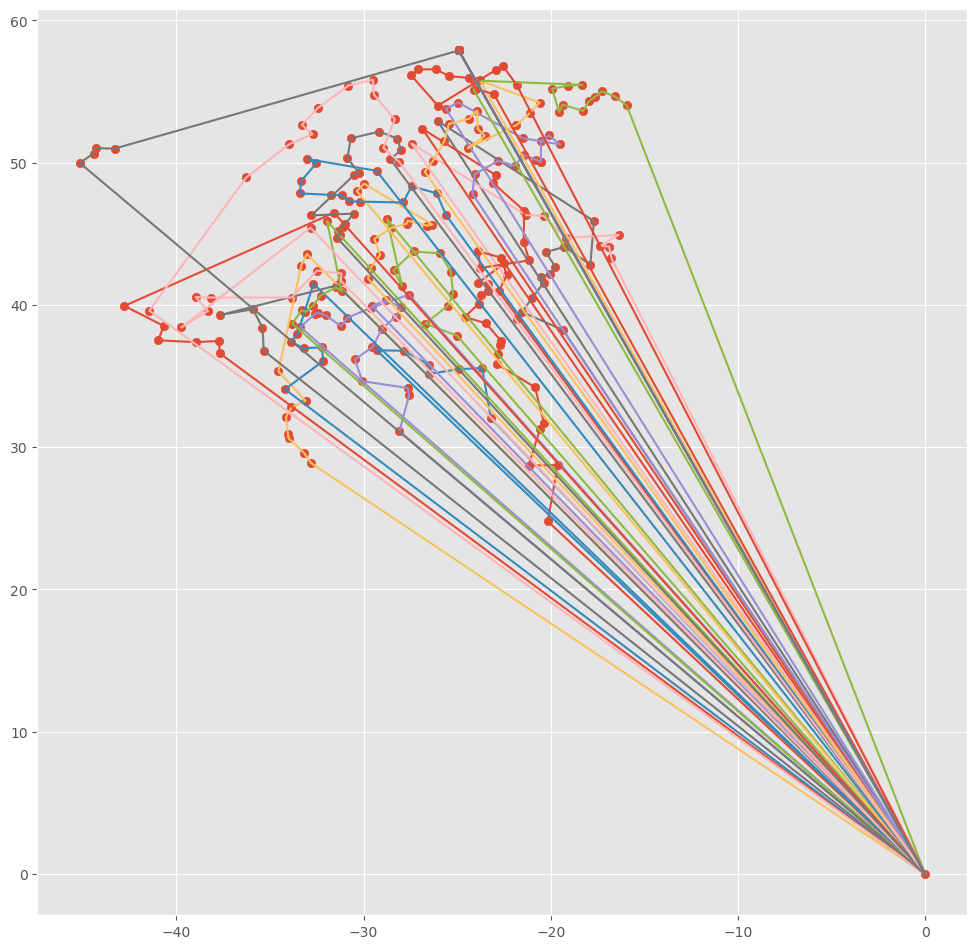

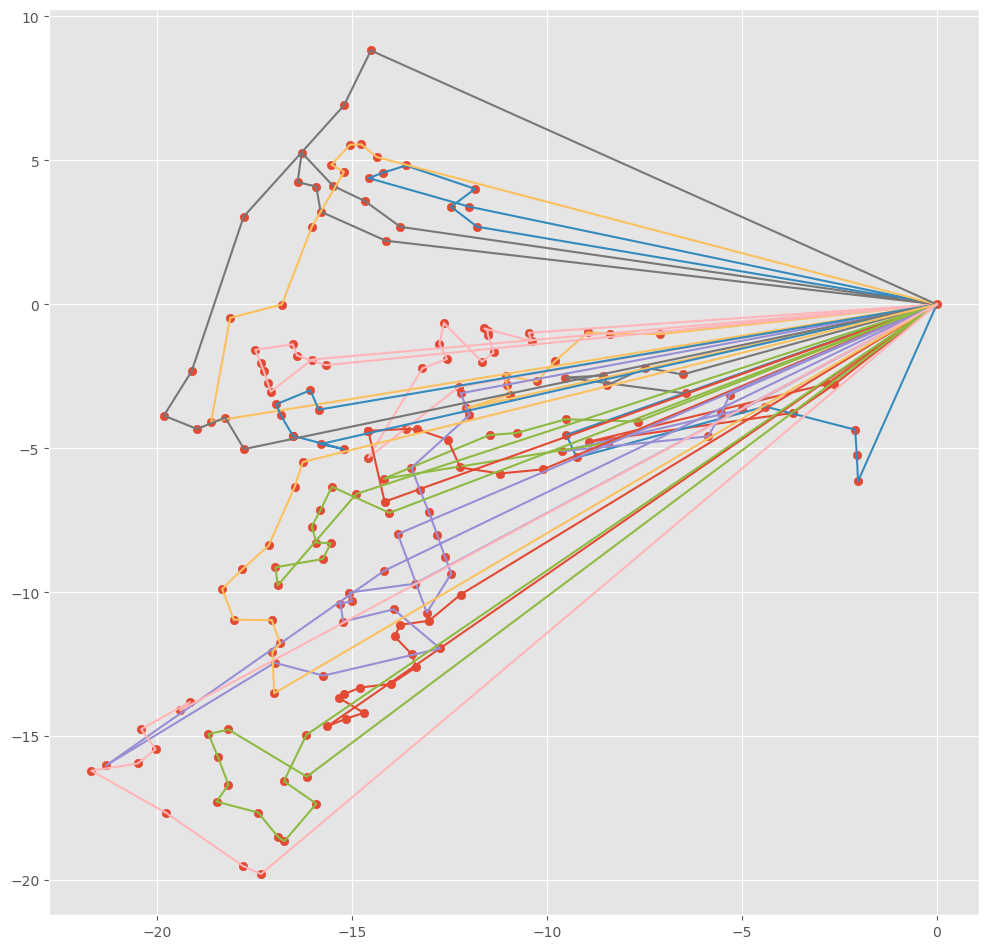

In [11]:
# local
# lenght: 15293.6

routs_clust_index = routs_clust_index = get_rout_index_with_clust()

for i in range(len(routs_clust_index)):
    fig = plt.figure(figsize=(12,12), dpi=100)

    x = df.iloc[clusters[i]]['lat']
    y = df.iloc[clusters[i]]['lon']
    scatter(x,y)

    routs = get_routs(routs_clust_index[i])
    for rout in routs:
        plt.plot(rout[0], rout[1])

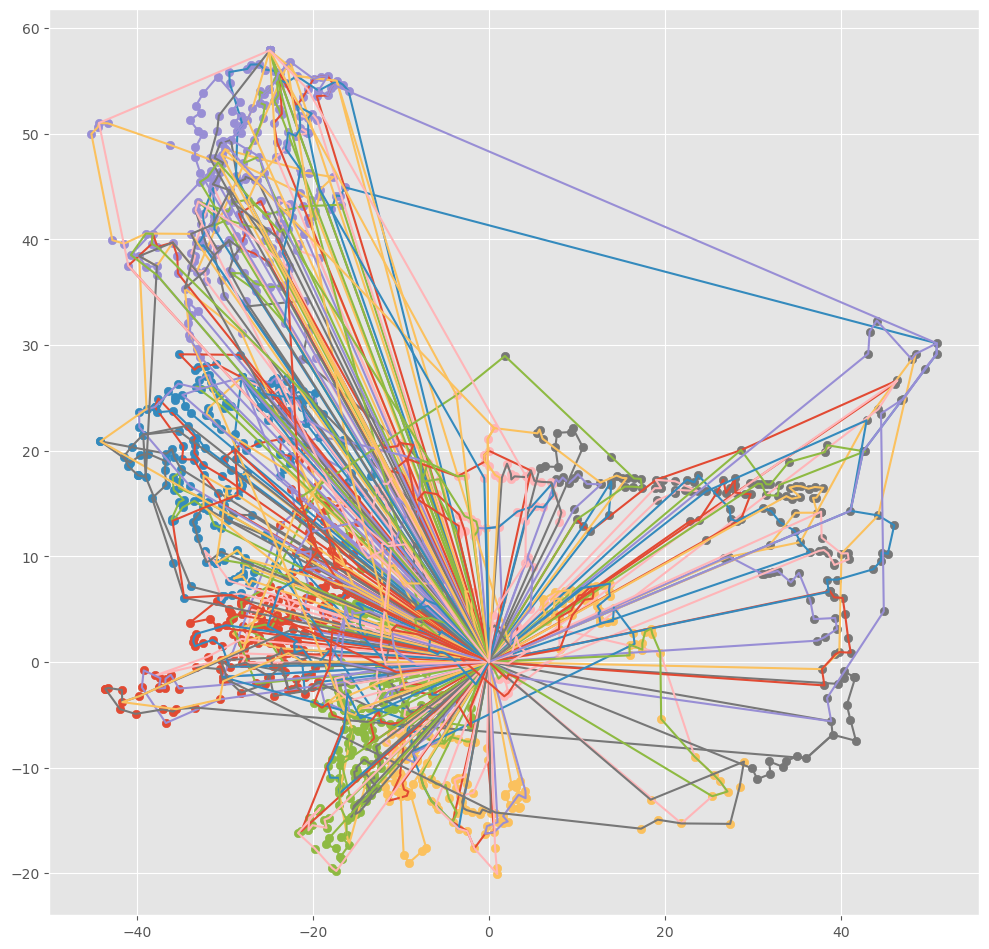

In [17]:
# absolut algorithm
# sum_gready lenght: 22152.7
# sum_osman lenght: 19681.9
# sum_local lenght: 19447.3
# lenght: 19447.3

routs_index = routs_clust_index = get_rout_index()

fig = plt.figure(figsize=(12,12), dpi=100)
for clust in clusters:
    x = df.iloc[clust]['lat']
    y = df.iloc[clust]['lon']
    scatter(x,y)

routs = get_routs(routs_index)
for rout in routs:
    plt.plot(rout[0], rout[1])